* draw sample from gan

In [1]:
import sys
sys.path.append('../')
from tqdm.auto import tqdm
from loader import get_dataloader
from augmentations import get_composed_augmentations
import torch

from tqdm.notebook import tqdm

from torch.nn.functional import softmax

import sys
sys.path.append('../')
from utils import roc_btw_arr

In [6]:
import matplotlib.pyplot as plt

In [93]:
train_dl = get_dataloader({'dataset': 'FGVC', 
                           'split':'training', 
                           'path': '../datasets', 
                           'batch_size': 64, 
                           'n_workers': 8, 
                           'shuffle':True})

Using No Augmentations
Using No Augmentations


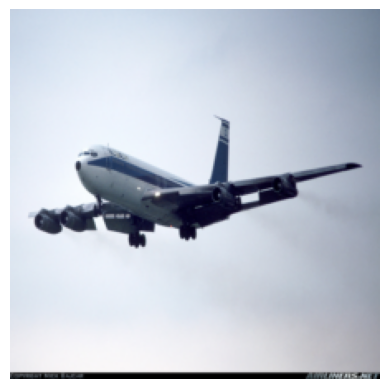

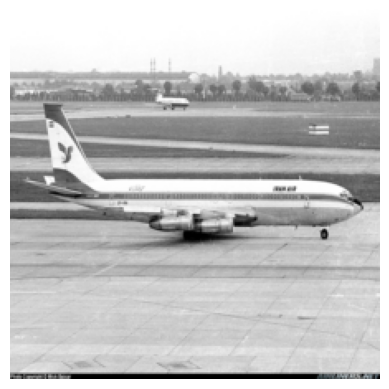

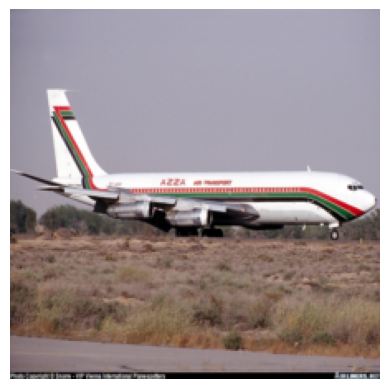

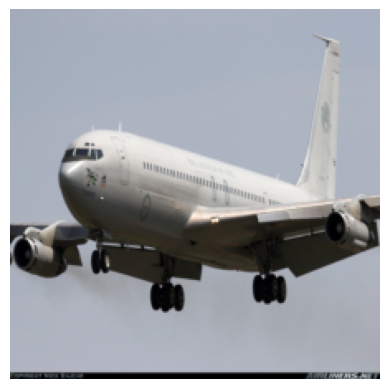

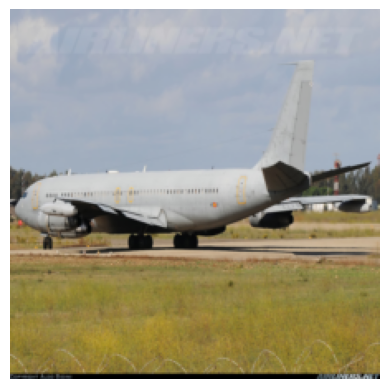

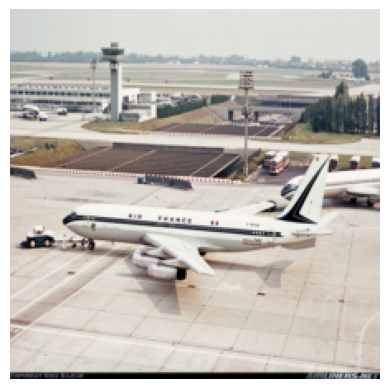

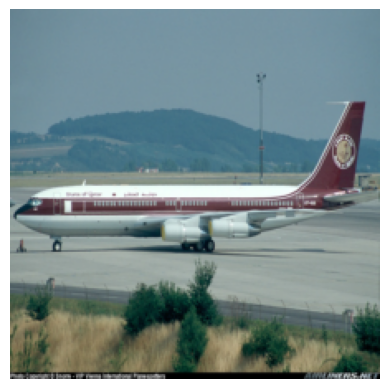

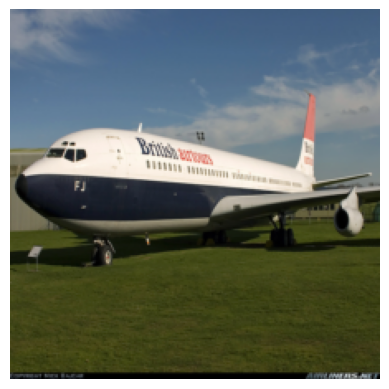

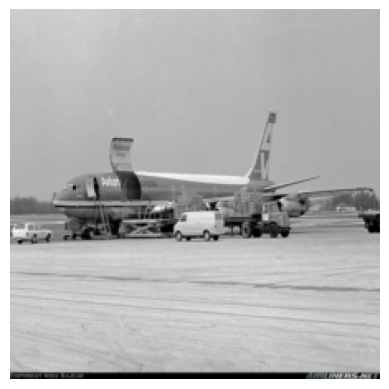

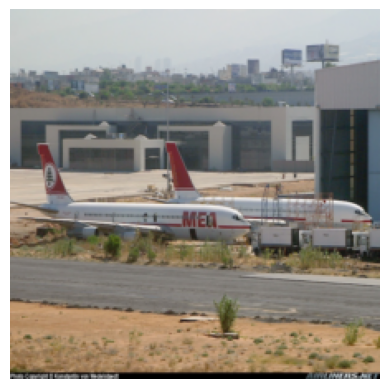

In [98]:
for i in range(10, 20):
    plt.figure()
    plt.imshow(train_dl.dataset[i][0].permute(1,2,0))
    plt.xticks([]); plt.yticks([]);
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
# plt.savefig('rimgnet/3.png')

In [99]:
from models import load_pretrained

In [101]:
m, _ = load_pretrained('fgvc_projgan/stylegan2_z16', ckpt_file='G_ema.pth', config_file='generator.yml', root='../pretrained')

In [104]:
import torch

In [149]:
z = torch.randn(10, 16)
z = z / z.norm(p=2, keepdim=True)

In [150]:
x = m.forward(z.cuda(), None).detach().cpu()

x = ((x + 1) * 0.5).clamp(0,1)

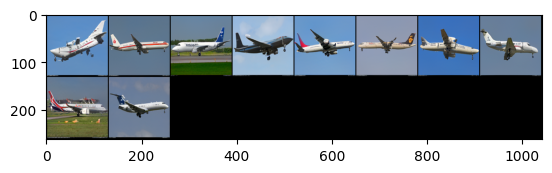

In [151]:
plt.imshow(make_grid(x).permute(1,2,0))

In [152]:
z0 = torch.tile(z[[3]],(6,1))
z1 = torch.tile(z[[8]],(6,1))
a = torch.linspace(0,1,6)[:,None]
zz = z0 * a + z1 * (1-a)
zz = zz / zz.norm(p=2, keepdim=True)

In [153]:
m.cuda();

In [154]:
xx = m.forward(zz.cuda(), None).detach().cpu()

xx = ((xx + 1) * 0.5).clamp(0,1)

In [155]:
from torchvision.utils import make_grid

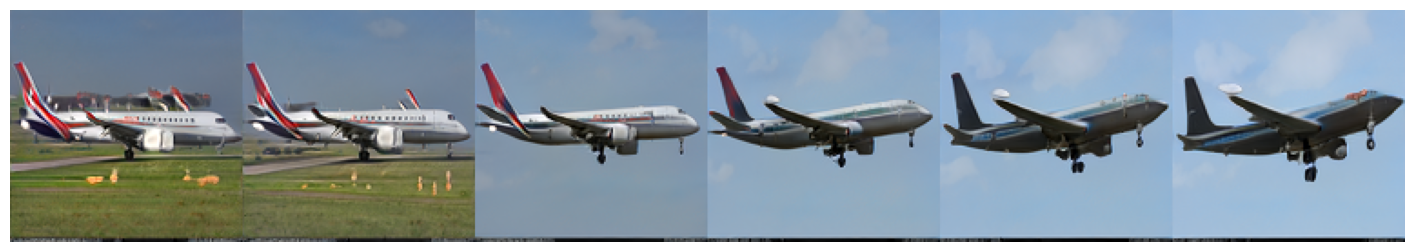

In [158]:
plt.figure(figsize=(18,18))
plt.imshow(make_grid(xx, padding=0).permute(1,2,0))
plt.xticks([]); plt.yticks([]);
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)